<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/2020/%EA%B9%80%EB%82%98%EC%97%B0/%5BDIP%5D%EA%B3%BC%EC%A0%9C_201838205_%EA%B9%80%EB%82%98%EC%97%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


## 1. Load the Image

In [3]:
base_path = "/content/drive/My Drive/2020DIP/"
file_path = "datasets/Lung-ROI-segmentation.PNG"

img_path = os.path.join(base_path, file_path)


In [4]:
img_path

'/content/drive/My Drive/2020DIP/datasets/Lung-ROI-segmentation.PNG'

In [6]:
img = cv2.imread(img_path)
print(img.shape)

(279, 850, 3)


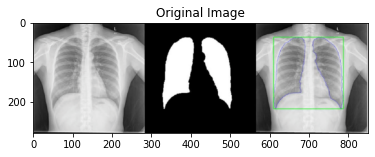

In [7]:
plt.title("Original Image")
plt.imshow(img)

## 2. Convert the BGR to Grayscale

(279, 850)


Text(0.5, 1.0, 'Grayscale Image')

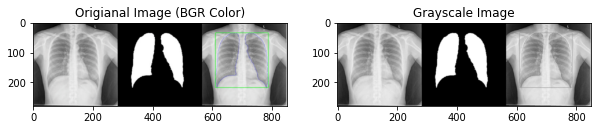

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img_gray.shape)

plt.figure(figsize=(10, 30))
# row 1, col 2, 1st
plt.subplot(121)
plt.imshow(img)
plt.title("Origianal Image (BGR Color)")

plt.subplot(122)
plt.imshow(img_gray, cmap="gray")
plt.title("Grayscale Image")



## 3. Image Slicing

In [9]:
col_sum = img_gray.sum(axis=0)

In [10]:
col_sum

array([66264, 56414, 32553, 27212, 26907, 26647, 26563, 26525, 26458,
       26460, 26403, 26437, 26471, 26502, 26625, 26741, 26834, 26852,
       26822, 26899, 26974, 27287, 27650, 27997, 28175, 28524, 29312,
       30100, 30712, 31143, 32196, 33385, 34628, 35824, 36446, 38050,
       39374, 40385, 41166, 42902, 45880, 46945, 47297, 47652, 48531,
       49303, 49838, 50049, 50015, 50103, 50150, 50281, 50235, 50185,
       50051, 49843, 49652, 49502, 49284, 49163, 49136, 49061, 48907,
       48648, 48489, 48374, 48309, 48237, 48143, 48033, 47993, 47947,
       47859, 47751, 47776, 47737, 47660, 47515, 47349, 47316, 47329,
       47238, 47147, 47010, 46956, 46881, 46930, 46877, 46733, 46656,
       46544, 46535, 46616, 46707, 46823, 47021, 47185, 47301, 47368,
       47420, 47717, 48212, 48441, 48478, 48616, 48854, 49088, 49171,
       49347, 49346, 49390, 49780, 50042, 50605, 51229, 51779, 51950,
       52215, 52679, 53704, 55200, 55999, 57193, 58709, 60264, 60971,
       61407, 61668,

> col_sum에서 10000보다 작은 인덱스가 시작하는 부분부터 끝나는 부분까지가 가운데(mask) 이미지의 검은색 영역이라고 판단

In [13]:
col_sum.shape

(850,)

In [11]:
line = np.where(col_sum < 10000)
print(line)

(array([284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296,
       297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309,
       310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322,
       323, 324, 325, 326, 327, 328, 329, 330, 406, 407, 408, 409, 410,
       411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423,
       424, 425, 426, 427, 428, 429, 430, 431, 432, 502, 503, 504, 505,
       506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
       519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
       532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544,
       545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
       558, 559, 560, 561, 562, 563, 564, 565]),)


In [14]:
line_start = line[0][0]
line_end = line[0][-1]

In [15]:
print("Index number of starting line: ", line_start)
print("Index number of ending line: ", line_end)


Index number of starting line:  284
Index number of ending line:  565


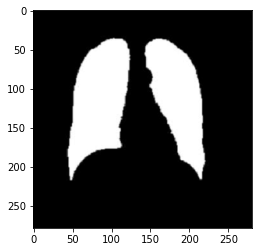

In [17]:
img_mid = img_gray[:, line_start:line_end]
plt.imshow(img_mid, cmap='gray')

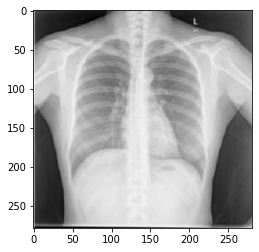

In [18]:
img_left = img_gray[:, :line_end-line_start]

plt.imshow(img_left, cmap='gray')

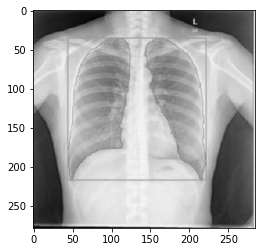

In [19]:
img_right = img_gray[:, line_end+1:]

plt.imshow(img_right, cmap='gray')

Text(0.5, 1.0, 'Right Image')

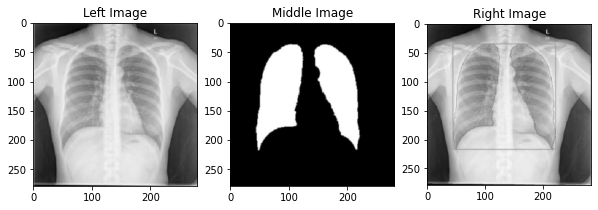

In [20]:
plt.figure(figsize=(10, 30))
# row 1, col 2, 1st
plt.subplot(131)
plt.imshow(img_left, cmap='gray')
plt.title("Left Image")

plt.subplot(132)
plt.imshow(img_mid, cmap="gray")
plt.title("Middle Image")

plt.subplot(133)
plt.imshow(img_right, cmap="gray")
plt.title("Right Image")

In [21]:
print(img_left.shape)
print(img_mid.shape)
print(img_right.shape)

(279, 281)
(279, 281)
(279, 284)


## ROI masking

In [22]:
mask = img_mid

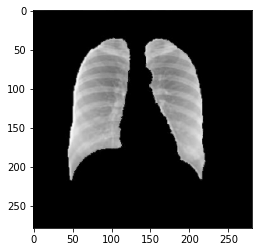

In [24]:
img_roi = cv2.bitwise_and(img_left, mask)

plt.imshow(img_roi, cmap="gray")
